In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install focal_loss

In [ ]:
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
import tensorflow.keras.utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras import regularizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten, Conv1D
from tensorflow.keras import backend as K

from tensorflow.keras.layers import Dropout
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

import tensorflow as tf
import time as tm
import datetime
import os
from operator import itemgetter
from numpy import argmax
from numpy import round
from focal_loss import BinaryFocalLoss

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.5.0
Uninstalling tensorflow-2.5.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.5.0


In [ ]:
pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.1 kB/s 
     |████████████████████████████████| 3.0 MB 62.4 MB/s 
     |████████████████████████████████| 2.9 MB 64.2 MB/s 
     |████████████████████████████████| 454 kB 50.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: h5py, absl-py, wrapt, gast, six, termcolor, wheel, scipy, tensorflow-estimator, numpy, keras-preprocessing, opt-einsum, protobuf, google-pasta, tensorboard, astunparse, grpcio
Required-by: kapre, focal-loss


In [ ]:
pip uninstall scikit-learn

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.22.2.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
pip install scikit-learn==0.24.0

     |████████████████████████████████| 22.3 MB 136 kB/s 


In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 0.24.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, scipy, joblib, threadpoolctl
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn


In [ ]:
y = np.load("/content/drive/Shareddrives/Experimentos_CNN/2_labels_20000.fasta.filtered_center_labels.npy")
y = y.astype('bool')

In [ ]:
x = np.load("/content/drive/Shareddrives/Experimentos_CNN/2_labels_20000.fasta.filtered_center.npy")
x = x.astype('bool')

In [ ]:
#y.dtype, x.dtype, y.__sizeof__(), x.__sizeof__(), y[9900:10100]

In [ ]:
validation_size = 0.2
seed = 7
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(x, y, test_size=validation_size,random_state=seed)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_test_dev, Y_test_dev, test_size=0.5, random_state=seed)

In [ ]:
X_train.shape

(16000, 5, 23200)

In [ ]:
path_log_base = '/content/drive/Shareddrives/Experimentos_CNN/Estiven/8/logs'

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
def metrics(Y_validation,predictions):
    classes = len(np.unique(Y_validation))
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(classes), range(classes))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 25},fmt='',cmap="YlOrRd") # font size
    #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_41.png',  bbox_inches='tight',dpi=500)
    #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_41.eps', format='eps')
    #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_41.svg', format='svg')
    #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_41.pdf', format='pdf') 
    plt.show()

In [ ]:
def graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID):
    numbers=AccTest
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Test Accuracy {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Train Accuracy {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['val_f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Validation F1-Score {}, Época:{}\n".format(value, index+1))

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #Plot training & validation accuracy values
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyVALID]),np.array(history.history['val_f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]),np.array(AccTest)],axis=0)) #Test
        plt.title('F1-Score Vs Epoch')
        plt.ylabel('F1-Score')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        plt.savefig("/content/drive/Shareddrives/Experimentos_CNN/Estiven/8/Figure_learning_1.png",  bbox_inches='tight',dpi=500)
        #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_40a_2.eps', format='eps')
        #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_40a_2.svg', format='svg')
        #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_40a_2.pdf', format='pdf')     
        
        plt.figure(figsize=(10, 10))
        #Plot training & validation loss values
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossVALID]),np.array(history.history['val_loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]),np.array(LossTest)],axis=0)) #Test
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        plt.savefig("/content/drive/Shareddrives/Experimentos_CNN/Estiven/8/Figure_40b_2.png",  bbox_inches='tight',dpi=500)
        #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_40b_2.eps', format='eps')
        #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_40b_2.svg', format='svg')
        #plt.savefig('/content/drive/Shareddrives/Prueba/Figure_40b_2.pdf', format='pdf')     
        plt.show() 

In [ ]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m, 'LeakyReLU': tensorflow.keras.layers.LeakyReLU(alpha=0.01), 'ELU': tensorflow.keras.layers.ELU(alpha=0.1)})
            loss,accuracy = model.evaluate(X_test, one_hot_labels_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [ ]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    
    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [ ]:
def TERL():
    tf.keras.backend.clear_session()

    # Inputs
    inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2], 1), name="input_1")
    # layer 1
    layers = tf.keras.layers.Conv2D(32, (5, 51),strides=(1, 1) ,activation=tf.keras.layers.LeakyReLU(0.01), kernel_regularizer=regularizers.l1_l2(0.0000, 0.000), bias_regularizer=regularizers.l1_l2(0.0000, 0.0000), use_bias=True)(inputs)
    layers = tf.keras.layers.SpatialDropout2D(0.2)(layers)
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.6, epsilon=0.003, scale=False)(layers)
    #layers = tf.keras.layers.AveragePooling2D((1, 15), strides=(1,1))(layers)
    layers = tf.keras.layers.AveragePooling2D((1, 9), strides=None)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, scale=False)(layers)

    # layer 2
    layers = tf.keras.layers.Conv2D(64, (1, 31),strides=(1, 1), activation=tf.keras.layers.LeakyReLU(0.01),  kernel_regularizer=regularizers.l1_l2(0.0000, 0.000), bias_regularizer=regularizers.l1_l2(0.0000, 0.0000), use_bias=True)(layers)
    layers = tf.keras.layers.SpatialDropout2D(0.2)(layers)
    tf.keras.layers.BatchNormalization(axis=1, momentum=0.6, epsilon=0.003, scale=False)(layers)
    layers = tf.keras.layers.AveragePooling2D((1, 9), strides=None)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, scale=False)(layers)

    # layer 3
    layers = tf.keras.layers.Conv2D(128, (1, 11),strides=(1, 1), activation=tf.keras.layers.LeakyReLU(0.01),  kernel_regularizer=regularizers.l1_l2(0.0000, 0.000), bias_regularizer=regularizers.l1_l2(0.0000, 0.0000), use_bias=True)(layers)
    layers = tf.keras.layers.SpatialDropout2D(0.2)(layers)
    tf.keras.layers.BatchNormalization(axis=1, momentum=0.6, epsilon=0.003, scale=False)(layers)
    layers = tf.keras.layers.AveragePooling2D((1, 9), strides=None)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, scale=False)(layers)
    
    # layer 4
    layers = tf.keras.layers.Conv2D(256, (1, 5),strides=(1, 1), activation=tf.keras.layers.LeakyReLU(0.01),  kernel_regularizer=regularizers.l1_l2(0.0000, 0.000), bias_regularizer=regularizers.l1_l2(0.0000, 0.0000), use_bias=True)(layers)
    layers = tf.keras.layers.SpatialDropout2D(0.2)(layers)
    tf.keras.layers.BatchNormalization(axis=1, momentum=0.6, epsilon=0.003, scale=False)(layers)
    layers = tf.keras.layers.AveragePooling2D((1, 9), strides=None)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, scale=False)(layers)

    # layer 5
    #layers = tf.keras.layers.SeparableConv2D(128, (1, 7),strides=(1, 1), activation=tf.keras.layers.LeakyReLU(0.01), depth_multiplier=1, depthwise_regularizer=regularizers.l1_l2(0.0000, 0.000), bias_regularizer=regularizers.l1_l2(0.0000, 0.0000), pointwise_regularizer=regularizers.l1_l2(0,0) , use_bias=True)(layers)
    #layers = tf.keras.layers.SpatialDropout2D(0.2)(layers)
    #tf.keras.layers.BatchNormalization(axis=1, momentum=0.6, epsilon=0.003, scale=False)(layers)
    #layers = tf.keras.layers.AveragePooling2D((1, 4), strides=None)(layers)

    # layer 5
    layers = tf.keras.layers.Flatten()(layers)
    #layers = tf.keras.layers.Dense(200,activation="Lrelu")(layers) 

    # layer 6
    layers = tf.keras.layers.Dense(200,activation=tf.keras.layers.LeakyReLU(0.01), kernel_regularizer=regularizers.l1_l2(0.0003, 0.000), bias_regularizer=regularizers.l1(0.001))(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.6, epsilon=0.001, scale=False)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, scale=False)(layers)
    # layer 7
    layers = tf.keras.layers.Dense(200,activation=tf.keras.layers.LeakyReLU(0.01), kernel_regularizer=regularizers.l1_l2(0.0003, 0.000), bias_regularizer=regularizers.l1(0.001))(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    tf.keras.layers.BatchNormalization(momentum=0.6, epsilon=0.001, scale=False)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, scale=False)(layers)

    # layer 8
    #layers = tf.keras.layers.Dense(300,activation=tf.keras.layers.LeakyReLU(0.01), kernel_regularizer=regularizers.l1_l2(0.0003, 0.000), bias_regularizer=regularizers.l1(0.001))(layers)
    #layers = tf.keras.layers.Dropout(0.3)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.6, epsilon=0.001, scale=False)(layers)
    #tf.keras.layers.BatchNormalization(momentum=0.2, epsilon=0.001, scale=False)(layers)

    # layer end
    predictions = tf.keras.layers.Dense(2, activation="softmax", name="output_1")(layers)
    # model generation
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    # optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    # loss function
    #loss_fn = tf.keras.losses.BinaryCrossentropy()
    loss_fn = BinaryFocalLoss(gamma=2)
    # Compile model
    model.compile(loss=loss_fn, optimizer=opt, metrics=[f1_m])
    return model

In [ ]:
# linea base, arquitectura de Nakano
# model = InpactorFNN_Net()

# arquitectura a afinar
model = TERL()
# summarize layers
print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
one_hot_labels_train = tf.keras.utils.to_categorical(Y_train, num_classes=2)
one_hot_labels_validation = tf.keras.utils.to_categorical(Y_dev, num_classes=2)
one_hot_labels_test = tf.keras.utils.to_categorical(Y_test, num_classes=2)

In [ ]:
#train(model, X_trainPCAScaler, Y_trainScaler, X_validationPCAScaler, Y_dev, X_testPCAScaler, Y_test, 128, 200, "InpactorFNN")
train(model, X_train, one_hot_labels_train, X_dev, one_hot_labels_validation, X_test, one_hot_labels_test, 128, 200, "TERL")
#history=model.fit(X_train,one_hot_labels_train,epochs=30,validation_data=(X_dev,one_hot_labels_validation),batch_size=10)

Epoch 1/200
125/125 [==============================] - 28s 224ms/step - loss: 0.9891 - f1_m: 0.5697 - val_loss: 0.2015 - val_f1_m: 0.6257
Epoch 2/200
125/125 [==============================] - 28s 224ms/step - loss: 0.1890 - f1_m: 0.6931 - val_loss: 0.1783 - val_f1_m: 0.7042
Epoch 3/200
125/125 [==============================] - 29s 230ms/step - loss: 0.1796 - f1_m: 0.7104 - val_loss: 0.1739 - val_f1_m: 0.7120
Epoch 4/200
125/125 [==============================] - 29s 231ms/step - loss: 0.1748 - f1_m: 0.7238 - val_loss: 0.1660 - val_f1_m: 0.7383
Epoch 5/200
125/125 [==============================] - 26s 207ms/step - loss: 0.1681 - f1_m: 0.7487 - val_loss: 0.1638 - val_f1_m: 0.7375
Epoch 6/200
125/125 [==============================] - 29s 229ms/step - loss: 0.1657 - f1_m: 0.7530 - val_loss: 0.1615 - val_f1_m: 0.7457
Epoch 7/200
125/125 [==============================] - 29s 235ms/step - loss: 0.1649 - f1_m: 0.7556 - val_loss: 0.1636 - val_f1_m: 0.7393
Epoch 8/200
125/125 [=============

{'f1_m': 0.8903769254684448, 'loss': 0.12124091386795044}

In [ ]:
# Fit the model
Final_Results_Test(log_Dir)

saved-model-001-0.6257.hdf5


In [ ]:
# plot metrics
plt.plot(history.history['f1_m'])
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Epoch vs F1-Score')
plt.show()

#GRÁFICOS DE LAS TRES CURVAS TRAIN TEST Y VALIDACIÓN
graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID)

Baseline Error train: 3.74%
Baseline Error dev: 10.86%
Baseline Error test: 9.03%
Accuracy: 0.9625625
F1 score: 0.9625070470797257
Recall: 0.9625625
Precision: 0.964681803932526

 clasification report:
               precision    recall  f1-score   support

       False       0.93      1.00      0.96      8077
        True       1.00      0.93      0.96      7923

    accuracy                           0.96     16000
   macro avg       0.96      0.96      0.96     16000
weighted avg       0.96      0.96      0.96     16000


 confusion matrix:
 [[8049   28]
 [ 571 7352]]


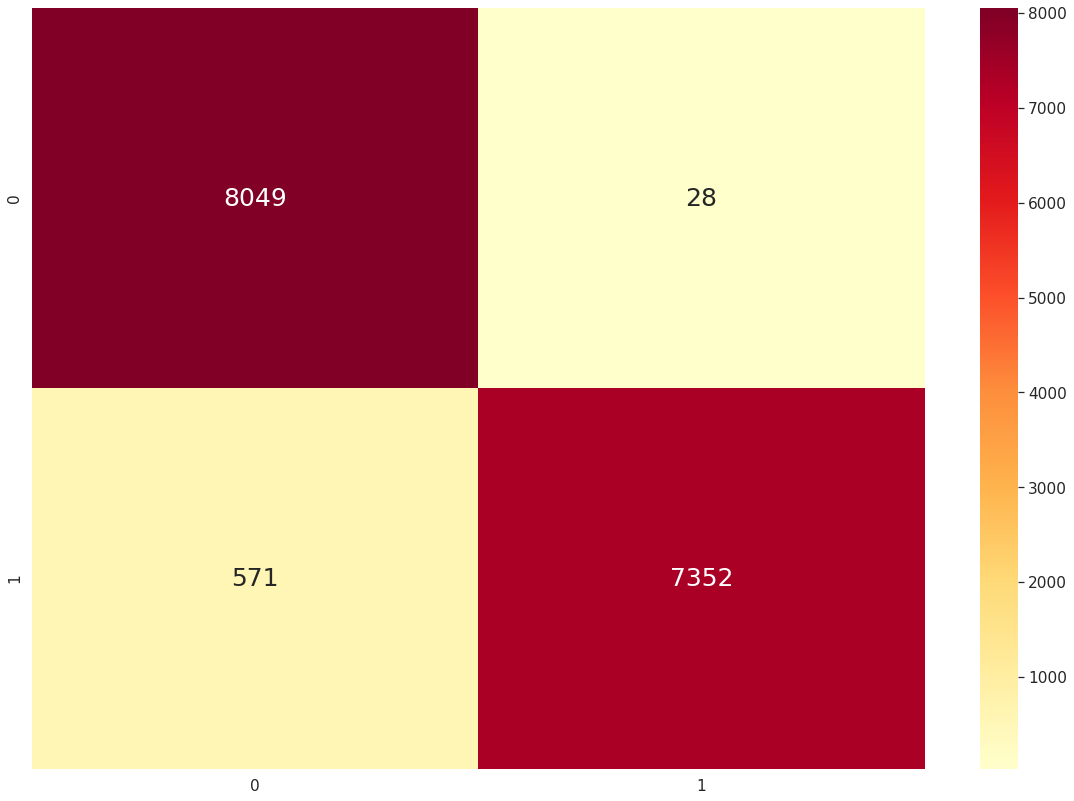

Accuracy: 0.8915
F1 score: 0.8913254071856034
Recall: 0.8915
Precision: 0.8964822286050371

 clasification report:
               precision    recall  f1-score   support

       False       0.85      0.94      0.89       975
        True       0.94      0.84      0.89      1025

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.89      0.89      2000


 confusion matrix:
 [[921  54]
 [163 862]]


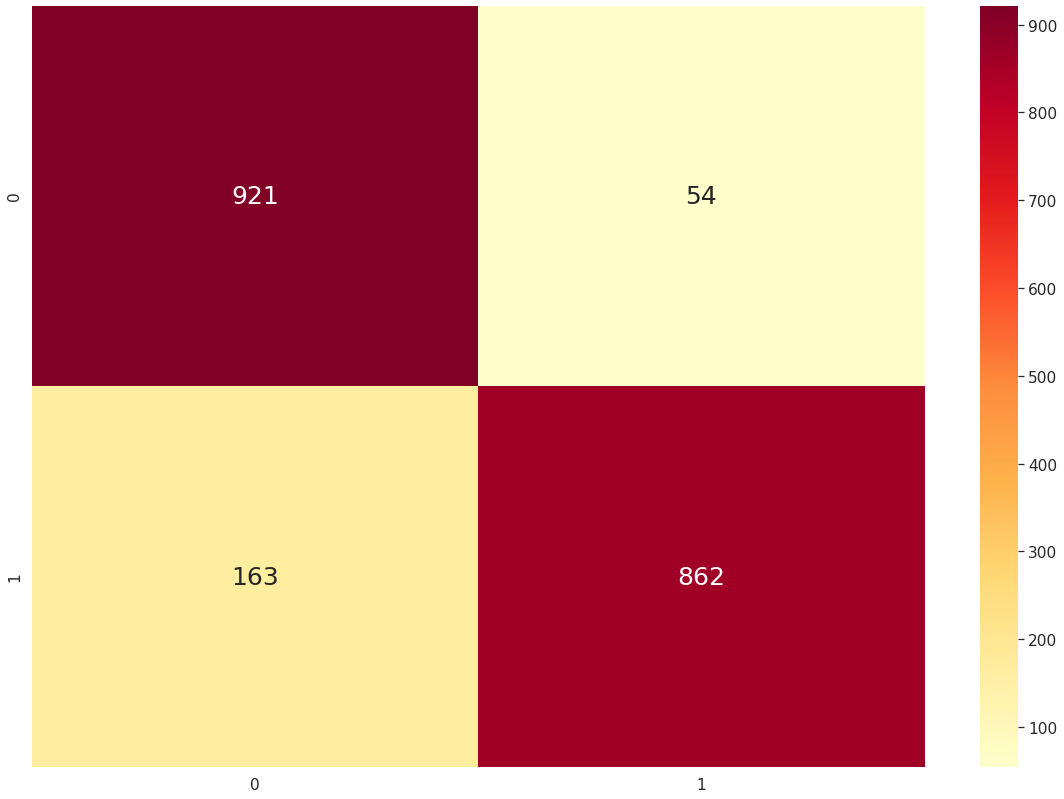

Accuracy: 0.91
F1 score: 0.910055097851704
Recall: 0.91
Precision: 0.9122146469496191

 clasification report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91       948
        True       0.94      0.88      0.91      1052

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000


 confusion matrix:
 [[892  56]
 [124 928]]


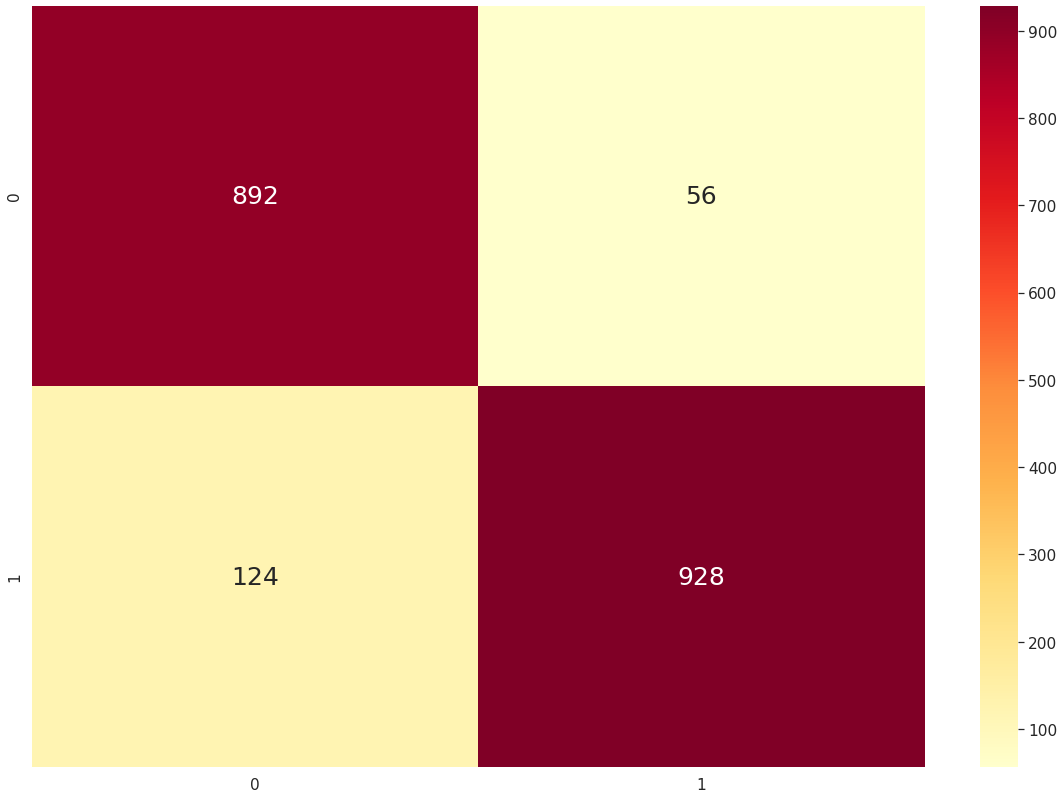

In [ ]:
scores = model.evaluate(X_train, one_hot_labels_train, verbose=0)
print("Baseline Error train: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_dev, one_hot_labels_validation, verbose=0)
print("Baseline Error dev: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_test, one_hot_labels_test, verbose=0)
print("Baseline Error test: %.2f%%" % (100-scores[1]*100))

predictions = model.predict(X_train)

metrics(Y_train, [argmax(x) for x in predictions])
#metrics(one_hot_labels_validation, [round(x,0) for x in predictions])

predictions = model.predict(X_dev)

metrics(Y_dev, [argmax(x) for x in predictions])
#metrics(Y_dev, [round(x,0) for x in predictions])

predictions = model.predict(X_test)

metrics(Y_test, [argmax(x) for x in predictions])
#metrics(Y_test, [round(x,0) for x in predictions])

Baseline Error test: 9.03%
Accuracy: 0.91
F1 score: 0.910055097851704
Recall: 0.91
Precision: 0.9122146469496191

 clasification report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91       948
        True       0.94      0.88      0.91      1052

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000


 confusion matrix:
 [[892  56]
 [124 928]]


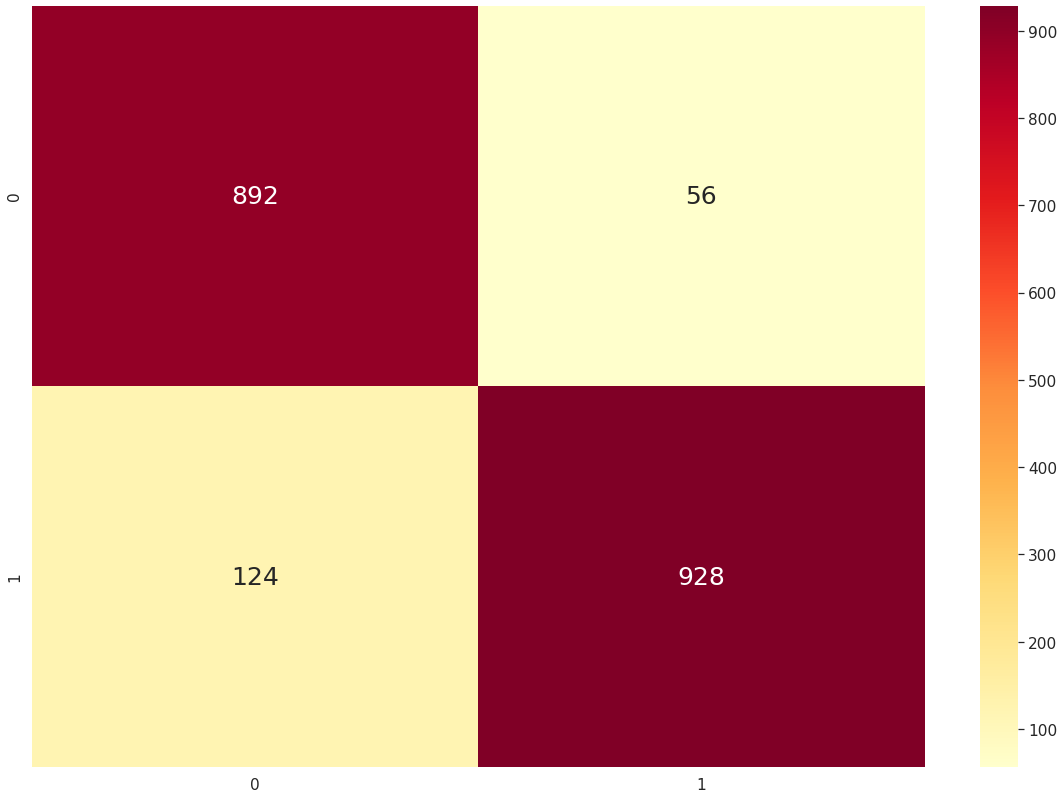

In [ ]:
scores = model.evaluate(X_test, one_hot_labels_test, verbose=0)
print("Baseline Error test: %.2f%%" % (100-scores[1]*100))
predictions = model.predict(X_test)

metrics(Y_test, [argmax(x) for x in predictions])

In [ ]:
lossVALID

In [ ]:
np.array([lossTEST])